In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [3]:
# Basics
import numpy as np
import pandas as pd

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Data preprocessing
from sklearn.impute import KNNImputer

# Model selection
from sklearn.model_selection import cross_validate

# Modelling
from sklearn.linear_model import LinearRegression

In [4]:
data = pd.read_csv("../input/house-prices-advanced-regression-techniques/train.csv", index_col="Id")
display(data.describe())
display(data.head())

print("\nShape", data.shape)
print("\n Dtypes")
display(data.dtypes.value_counts())
print("\nDuplicates", data.duplicated().sum())
print("\nNulls")
display(data.isnull().sum().sort_values(ascending=False).head(20))

print("Columns:", data.columns)


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000



Shape (1460, 80)

 Dtypes


object     43
int64      34
float64     3
Name: count, dtype: int64


Duplicates 0

Nulls


PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtCond          37
BsmtQual          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
MSSubClass         0
dtype: int64

Columns: Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDr

### Split into X and y

In [5]:
X = data.drop("SalePrice", axis=1)
y = data["SalePrice"]

print(X.shape, y.shape)

(1460, 79) (1460,)


## Initial data analysis

#### Check for duplicates

In [6]:
print("Train", data.duplicated().sum())

if data.duplicated().sum() == 0:
    print("Neither train nor test data contain duplicate value.")

Train 0
Neither train nor test data contain duplicate value.


#### Split into numerical/categorical

In [7]:
print(data.dtypes.value_counts())

X_cat = X.select_dtypes("object")
X_num = X.select_dtypes("number")

print(X_cat.shape)
print(X_num.shape)

object     43
int64      34
float64     3
Name: count, dtype: int64
(1460, 43)
(1460, 36)


### Handle empty values 

#### Numerical

In [8]:
missing_mum = pd.DataFrame(X_num.isnull().sum().sort_values(ascending=False))
missing_mum.loc[missing_mum[0] > 0]

,0
LotFrontage,259
GarageYrBlt,81
MasVnrArea,8


In [9]:
# Let's impute these
knn_imputer = KNNImputer().set_output(transform="pandas")
X_num = knn_imputer.fit_transform(X_num)

In [10]:
X_num.isnull().sum().sort_values(ascending=False).head(5)


MSSubClass      0
LotFrontage     0
BedroomAbvGr    0
KitchenAbvGr    0
TotRmsAbvGrd    0
dtype: int64

In [11]:
X_num.head(5)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
1,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,0.0,...,548.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0
2,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,0.0,...,460.0,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0
3,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,0.0,...,608.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0
4,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,0.0,...,642.0,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0
5,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,0.0,...,836.0,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0


#### Categorical

In [12]:
unique_cat = pd.DataFrame(X_cat.nunique()).rename(columns={0:"unique"}).sort_index()
missing_cat = pd.DataFrame(X_cat.isnull().sum()).rename(columns={0:"missing"}).sort_index()
pd.concat(objs=[unique_cat, missing_cat], axis=1).sort_values("unique")


,unique,missing
Alley,2,1369
Street,2,0
CentralAir,2,0
Utilities,2,0
LandSlope,3,0
MasVnrType,3,872
PavedDrive,3,0
PoolQC,3,1453
GarageFinish,3,81
BsmtCond,4,37


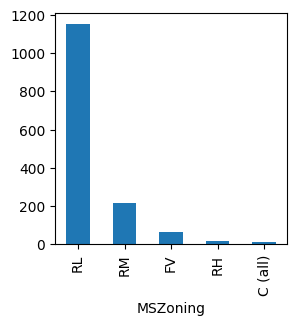

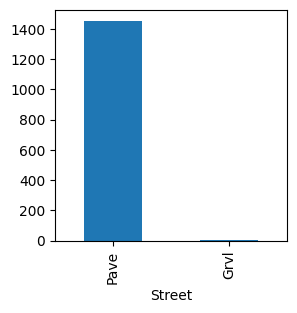

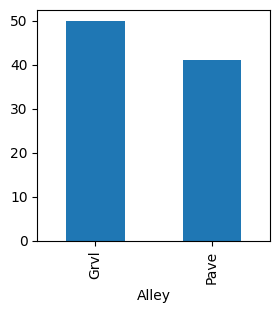

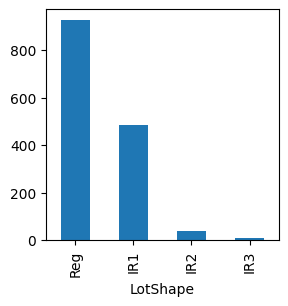

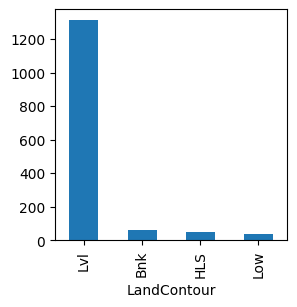

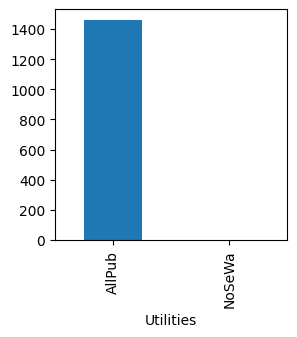

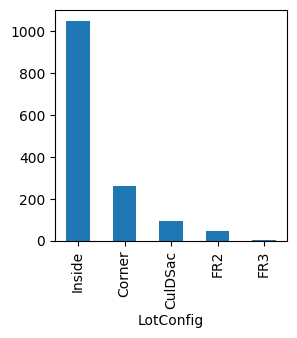

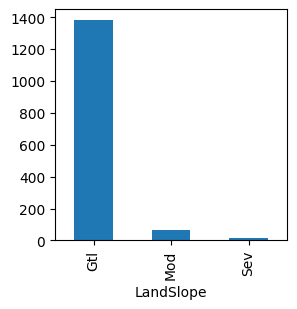

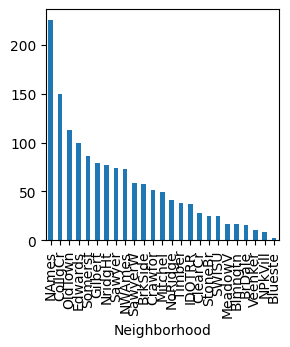

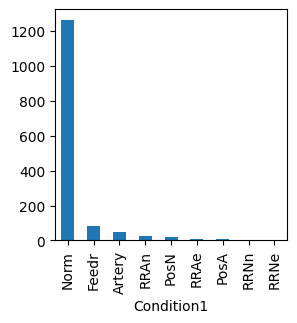

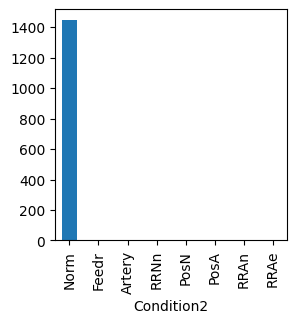

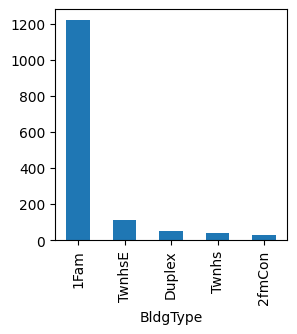

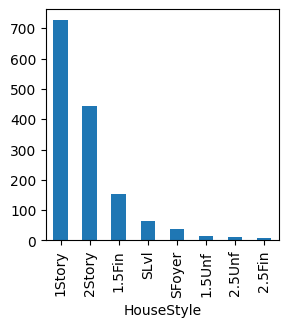

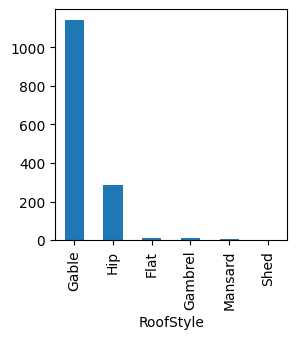

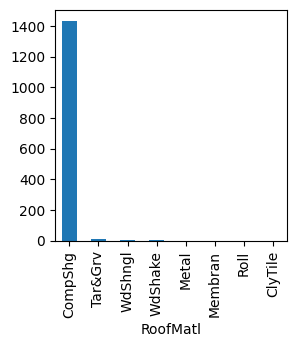

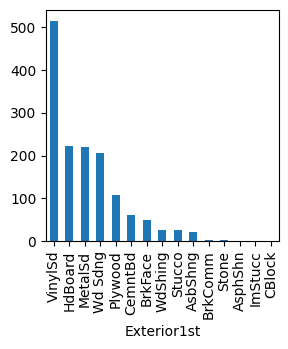

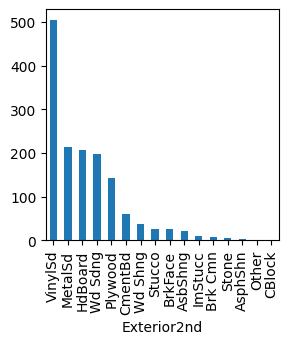

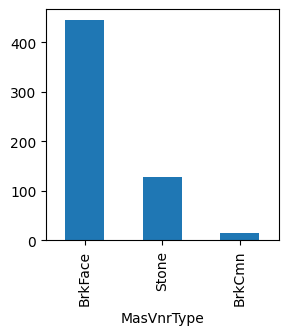

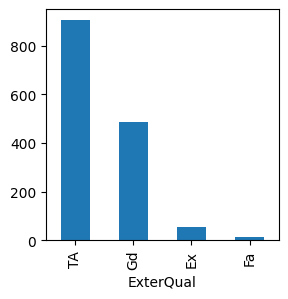

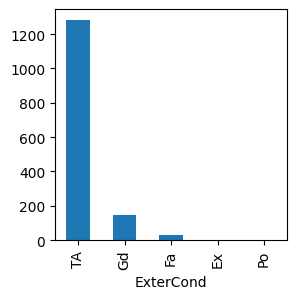

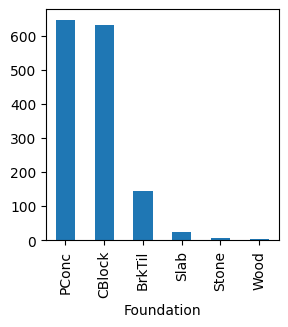

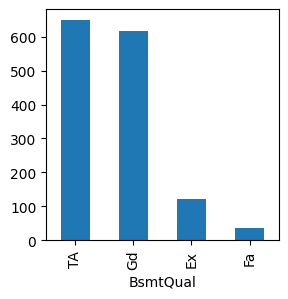

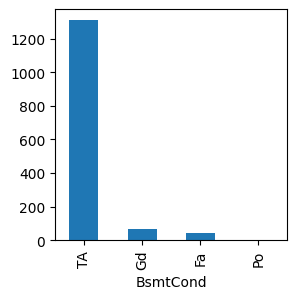

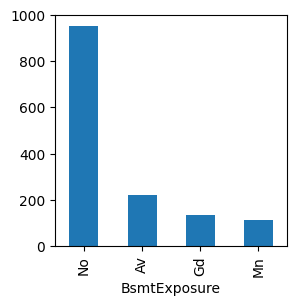

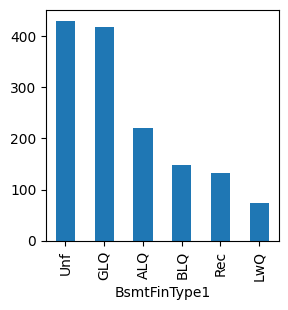

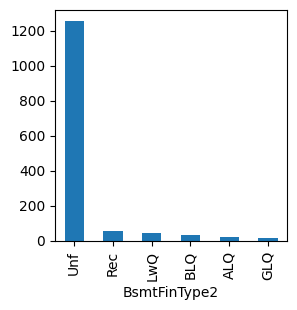

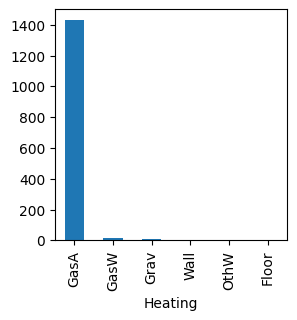

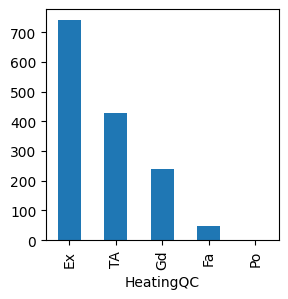

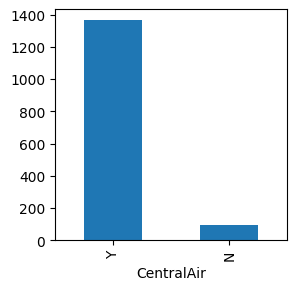

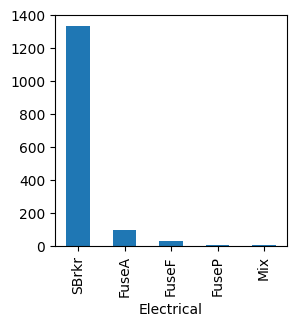

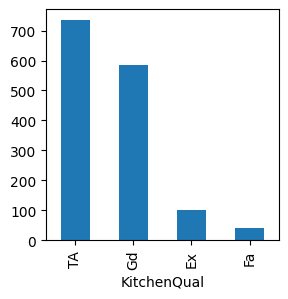

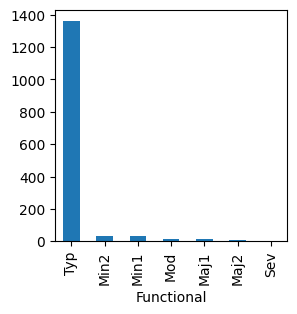

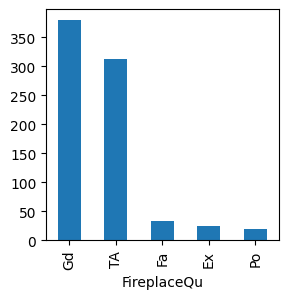

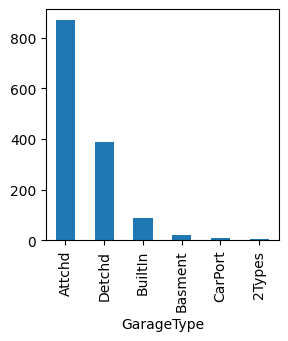

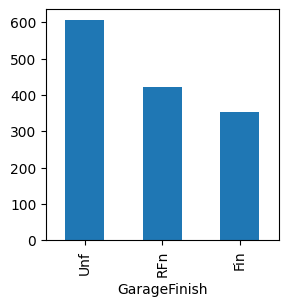

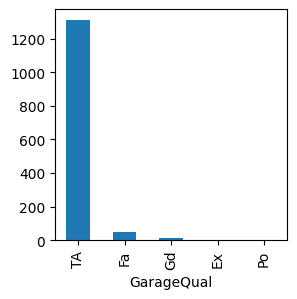

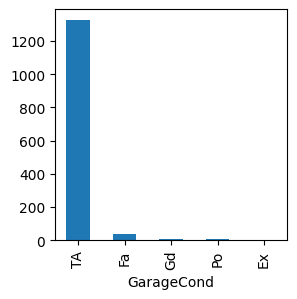

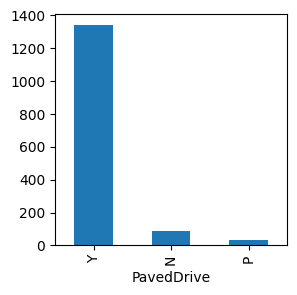

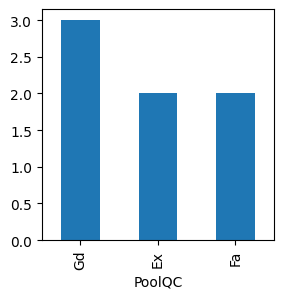

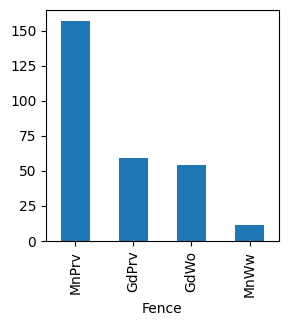

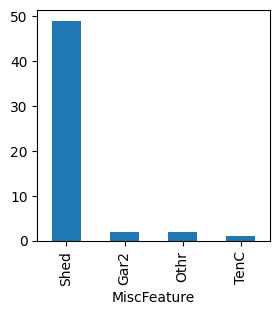

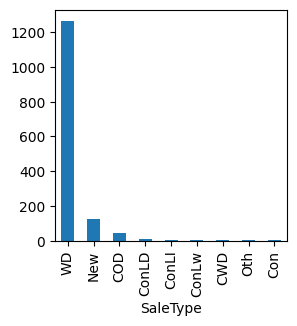

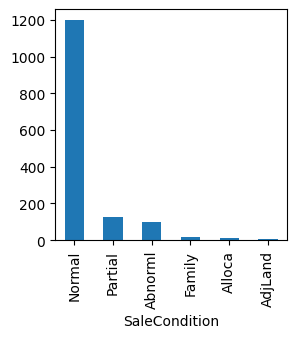

In [29]:
for col in X_cat.columns:
    X_cat[col].value_counts().plot(kind="bar", figsize=(3,3))
    plt.show()

In [ ]:
X_cat["KitchenQual"].value_counts(dropna=False)

In [ ]:
X_cat["BsmtFinType1"].value_counts(dropna=False)
X_cat["BsmtFinType1"] = X_cat["BsmtFinType1"].str.replace(np.nan, "NoBasement")
X_cat["BsmtFinType1"].value_counts(dropna=False)

In [35]:
X_cat["HeatingQC"].value_counts()

HeatingQC
Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: count, dtype: int64

In [38]:
X_cat["GarageFinish"].value_counts()

GarageFinish
Unf    605
RFn    422
Fin    352
Name: count, dtype: int64

## Create baseline model

In [ ]:
baseline = LinearRegression()

In [ ]:
cv_simple_num = cross_validate(estimator=baseline, X=X_num, y=y)

In [ ]:
print(cv_simple_num)
print("Mean score", cv_simple_num["test_score"].mean())